In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LinearRegression
import pickle

In [3]:
df= pd.read_csv('AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [4]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
df.drop(['host_name','last_review','reviews_per_month'],1,inplace=True)

In [7]:
df.fillna(1)

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129
6,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,1,0
7,5178,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,4,188


In [8]:
neigh = set(df['neighbourhood_group'])
neighbour = list(neigh)
neighbour 

['Manhattan', 'Brooklyn', 'Bronx', 'Staten Island', 'Queens']

In [9]:
count={}
x=0
for i in neigh:
    for j in df['neighbourhood_group']:
        if(i==j):
            x+=1
    if i not in count:
        count[i] = x
count_value =list(count.values())
count, count_value

({'Manhattan': 21661,
  'Brooklyn': 41765,
  'Bronx': 42856,
  'Staten Island': 43229,
  'Queens': 48895},
 [21661, 41765, 42856, 43229, 48895])

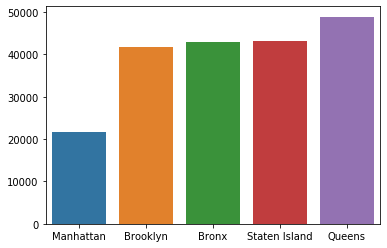

In [10]:
plt.figure()
sns.barplot(x=neighbour,y=count_value, data=df)

In [11]:
neighbourhood_group_count = df.groupby('neighbourhood_group').agg('count').reset_index()
neighbourhood_group_count

,neighbourhood_group,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Bronx,1091,1090,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091
1,Brooklyn,20104,20098,20104,20104,20104,20104,20104,20104,20104,20104,20104,20104
2,Manhattan,21661,21652,21661,21661,21661,21661,21661,21661,21661,21661,21661,21661
3,Queens,5666,5666,5666,5666,5666,5666,5666,5666,5666,5666,5666,5666
4,Staten Island,373,373,373,373,373,373,373,373,373,373,373,373


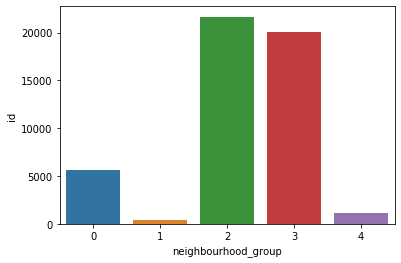

In [187]:
fig = plt.subplot()
sns.barplot(x='neighbourhood_group',y='id',data=neighbourhood_group_count)

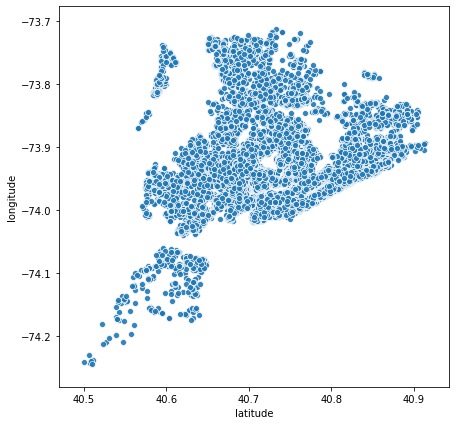

In [188]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='latitude',y='longitude', data=df, alpha=.9)

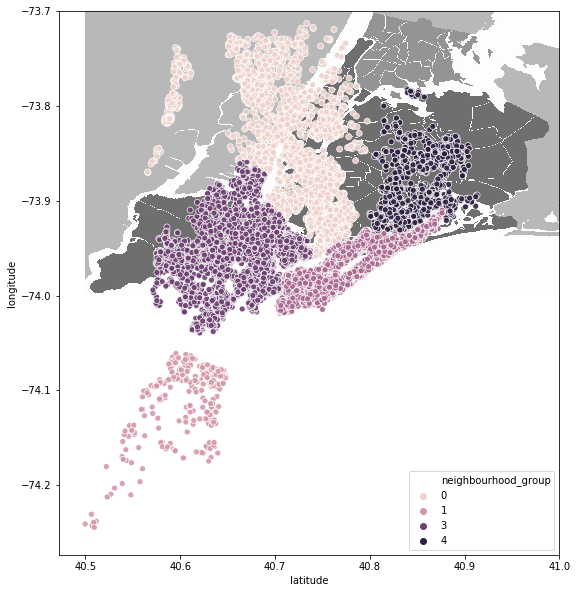

In [189]:
i='New_York_City_.jpeg'
plt.figure(figsize=(10,10))
img = plt.imread(i)
plt.imshow(img,extent=[40.5, 41, -74, -73.7])
sns.scatterplot(x='latitude',y='longitude', data=df,hue='neighbourhood_group', alpha=.9)

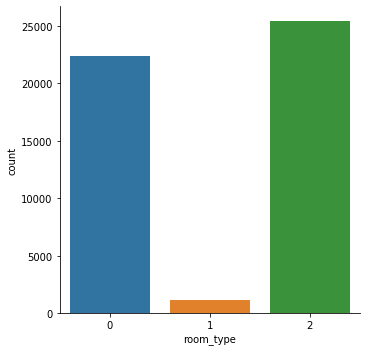

In [190]:
sns.catplot(x='room_type', data=df, kind='count')

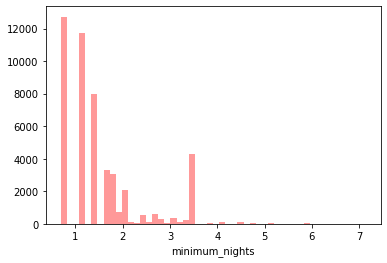

In [191]:
sns.distplot(np.log1p(df['minimum_nights']), color='red',rug=False, kde=False)

(0, 365)

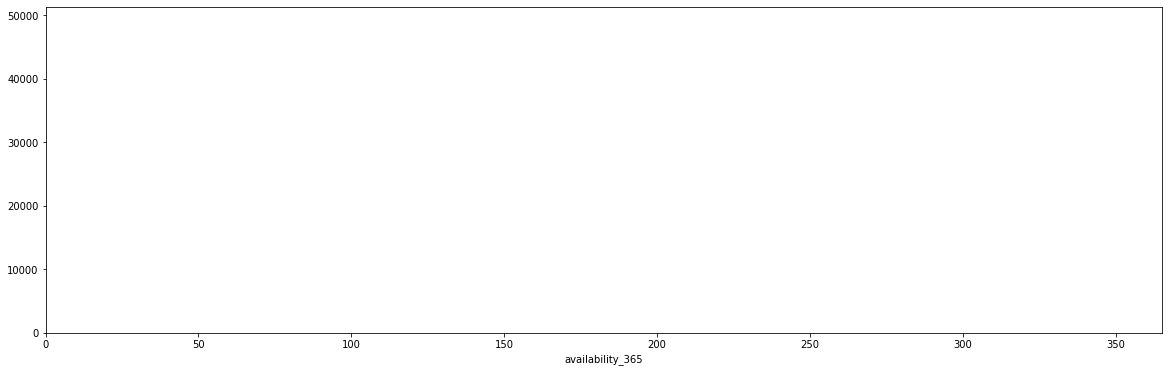

In [192]:
fig, axes = plt.subplots(1,1,figsize=(20, 6))
sns.distplot(df['availability_365'],rug=False,kde=False)
axes.set_xlim(0, 365)

In [193]:
def convert_to_int(df):
    column = df.columns.values
    
    for col in column:
        text_to_int={}
        
        def to_list(val):
            return text_to_int[val]
        
        if df[col].dtype!=np.int64 and df[col].dtype!=np.float64:
            element = df[col].values.tolist()
            unique_element = set(element)
            
            x=0
            for unique in unique_element:
                if unique not in text_to_int:
                    text_to_int[unique]=x
                    x+=1
            df[col] = list(map(to_list, df[col]))
    return df.head(5)     
        

convert_to_int(df)    

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,3,75,40.64749,-73.97237,0,149,1,9,0.21,6,365
1,2595,2845,2,38,40.75362,-73.98377,2,225,1,45,0.38,2,365
2,3647,4632,2,46,40.80902,-73.94190,0,150,3,0,NaN,1,365
3,3831,4869,3,119,40.68514,-73.95976,2,89,1,270,4.64,1,365
4,5022,7192,2,166,40.79851,-73.94399,2,80,10,9,0.10,1,365


In [199]:
df.fillna(1,inplace=True)

In [200]:
X = np.array(df.drop(['price'],1))
y = np.array(df['price'])

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [206]:
len(X_train), len(y_train)

(39116, 39116)

In [207]:
clf = svm.SVC()

In [208]:
clf.fit(X_train,y_train)

/Users/manukhurana/Desktop/Python/venv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [209]:
score = clf.score(X_test,y_test)

In [210]:
score

0.04008589835361489